<a href="https://colab.research.google.com/github/Peksyaji/Data_Mining_and_BI/blob/main/DatMin2_Klasterisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    !pip install umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-01-11 02:59:59--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.2’

tau_unsup.py.2      100%[===================>]  16.98K  --.-KB/s    in 0s      

2023-01-11 02:59:59 (60.6 MB/s) - ‘tau_unsup.py.2’ saved [17387/17387]



In [3]:
import umap, tau_unsup as tau
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

# Preprocessing

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ammardaffa/Data-Mining-2/main/Case-Study-02-MixITup.csv', sep=';')
df.sample(10)

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
18,119,Wanita,45,"Rp5,327,868",32,1,Tangerang,3.0,Sabtu,3
170,271,Wanita,27,"Rp12,704,918",51,1,Jakarta,1.0,Senin,4
107,208,Wanita,19,"Rp20,491,803",50,0,Jakarta,1.0,Senin,8
98,199,Wanita,40,"Rp22,131,147",58,1,Jakarta,1.0,Sabtu,2
177,278,Wanita,30,"Rp7,786,885",73,0,Depok,1.0,Senin,7
182,283,Wanita,47,"Rp43,032,786",16,1,Tangerang,3.0,Sabtu,2
5,106,Wanita,33,"Rp29,098,360",95,1,Depok,0.0,Senin,0
146,247,Pria,19,"Rp13,524,590",59,0,Jakarta,1.0,Senin,5
12,113,Pria,46,"Rp34,016,393",15,1,Tangerang,3.0,Selasa,7
152,253,Pria,59,"Rp31,967,213",14,1,Tangerang,3.0,Minggu,5


In [5]:
#membuat data pendapatan menjadi tipe float dengan langkah berikut
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('Rp', '', regex=True) #men-drop Rp dari data
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace(',', '', regex=True) #menghilangkan , dari data
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace(' ', '', regex=True) #menghilangkan spasi dari data
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype(float) #membuat data ber-tipe float

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    float64
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 15.8+ KB


In [7]:
print(set(df['Jenis Kelamin']))

{'Pria', 'Wanita', '-', nan}


In [8]:
# Modus kolom Jenis Kelamin
df['Jenis Kelamin'].mode()

0    Wanita
dtype: object

In [9]:
# Mengganti '-' pada kolom Jenis Kelamin dengan 'Wanita' sebagai modus
df['Jenis Kelamin'] = df['Jenis Kelamin'].str.replace('-', 'Wanita', regex=True)
# Mengganti nan pada kolom Jenis Kelamin dengan 'Wanita' sebagai modus
df['Jenis Kelamin'] = df['Jenis Kelamin'].fillna('Wanita')

In [10]:
print(set(df['Umur']))

{'49', '29', '42', '25', '34', '58', '19', '51', '45', '24', "35'", '32', '60', '20', '57', '22', '18', '55', '44', '23', '33', '43', '41', '52', '36', '48', '47', '46', '37', '53', '35', '26', '40', '2', '27', '56', '54', '28', '31', '39', '21', '50', '30', '59', '38'}


In [11]:
# Mengganti 35' dengan 35
df['Umur'] = df['Umur'].str.replace("35'", '35', regex=True)

In [12]:
print(set(df['Pendapatan-per-bulan']))

{50000000.0, 0.0, 13114754.0, 26229508.0, 7786885.0, 2459016.0, 34016393.0, 28688524.0, 10245901.0, 23360655.0, 18032786.0, 12704918.0, 25819672.0, 7377049.0, 20491803.0, 2049180.0, 33606557.0, 9836065.0, 22950819.0, 36065573.0, 17622950.0, 25409836.0, 20081967.0, 1639344.0, 9426229.0, 22540983.0, 4098360.0, 17213114.0, 11885245.0, 25000000.0, 19672131.0, 1229508.0, 14344262.0, 9016393.0, 22131147.0, 3688524.0, 35245901.0, 29918032.0, 11475409.0, 43032786.0, 24590163.0, 6147540.0, 19262295.0, 819672.0, 13934426.0, 45491803.0, 27049180.0, 40163934.0, 3278688.0, 29508196.0, 11065573.0, 24180327.0, 5737704.0, 18852459.0, 409836.0, 31967213.0, 13524590.0, 21311475.0, 34426229.0, 15983606.0, 29098360.0, 23770491.0, 5327868.0, 18442622.0}


In [13]:
print(set(df['skor-pengeluaran']))

{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 26, 27, 28, 29, 31, 32, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 65, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 101}


In [14]:
# Mengganti nilai skor pengeluaran 101 karena berada di luar skala, menjadi 100
df['skor-pengeluaran'] = df['skor-pengeluaran'].replace({101:100})

In [15]:
print(set(df['Menikah']))

{nan, '0', '1', '-', ' '}


In [16]:
df['Menikah'].mode()

0    1
dtype: object

In [17]:
# Mengganti '-' pada kolom Menikah dengan '1' sebagai modus
df['Menikah'] = df['Menikah'].str.replace('-', '1', regex=True)
# Mengganti ' ' pada kolom Menikah dengan '1' sebagai modus
df['Menikah'] = df['Menikah'].str.replace(' ', '1', regex=True)
# Mengganti nan pada kolom Jenis Kelamin dengan 'Wanita' sebagai modus
df['Menikah'] = df['Menikah'].fillna(1)

In [18]:
print(set(df['Kota']))

{'Depok', 'Jakarta', 'Tangerang', 'JJakarta'}


In [19]:
# Mengganti 'JJakarta' pada kolom Kota dengan 'Jakarta'
df['Kota'] = df['Kota'].str.replace('JJakarta', 'Jakarta', regex=True)

In [20]:
print(set(df['Promo']))

{0.0, 1.0, 2.0, 3.0, nan, 5.0, nan, nan, nan, nan, nan}


In [21]:
df['Promo'].mode()

0    1.0
dtype: float64

In [22]:
# Mengisi missing value pada kolom Promo dengan 1.0 sebagai modus
df['Promo'] = df['Promo'].fillna(1.0)

In [23]:
print(set(df['HariFav']))

{'Jumat', 'Senin', 'Kamis', 'Minggu', 'Sabtu', 'Selasa', 'Rabu'}


In [24]:
print(set(df['FavFlavor']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [25]:
# Tidak ada kode rasa 9, maka kami mengantinya menjadi 8
df['FavFlavor'] = df['FavFlavor'].replace({9:8})

In [26]:
# Cek duplikasi data
df.duplicated().sum()

0

In [27]:
# Karena dirasa tidak dibutuhkan, kolom ID dihapus
df.drop(labels='ID', axis=1, inplace=True)

In [28]:
# cek missing value
df.isnull().sum()

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64

In [29]:
# Memnbuat masing-masing variabel menjadi tipe yang sesuai
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category') #membuat variabel Jenis Kelamin bertipe Kategori
df['Umur'] = df['Umur'].astype('int') #membuat variabel Umur bertipe Float
df['Menikah'] = df['Menikah'].astype('category') #membuat variabel Menikah bertipe Kategori
df['Kota'] = df['Kota'].astype('category') #membuat variabel Kota bertipe Kategori
df['HariFav'] = df['HariFav'].astype('category') #membuat variabel HariFav bertipe Kategori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         200 non-null    category
 1   Umur                  200 non-null    int64   
 2   Pendapatan-per-bulan  200 non-null    float64 
 3   skor-pengeluaran      200 non-null    int64   
 4   Menikah               200 non-null    category
 5   Kota                  200 non-null    category
 6   Promo                 200 non-null    float64 
 7   HariFav               200 non-null    category
 8   FavFlavor             200 non-null    int64   
dtypes: category(4), float64(2), int64(3)
memory usage: 9.4 KB


# EDA&Visualisasi

In [30]:
import plotly.express as px
fig1 = px.bar(df.groupby(
    'Kota', as_index=False)['skor-pengeluaran'].max().sort_values(
    by='skor-pengeluaran', ascending=False).head(10), x='Kota',
              y='skor-pengeluaran', color='Kota',
              labels={'Kota':'Kota',
                      'skor-pengeluaran':'skor-pengeluaran'}, 
              template='ggplot2', text='skor-pengeluaran',
              title=' Penjualan Ice Cream di setiap cabang')
fig1.show()

Melalui plot yang didapatkan dari skor pengeluaran antara Kota Jakarta, Kota Tangerang, dan Kota Depok, dapat dilihat bahwa skor pengeluaran customer dari Kota Jakarta adalah yang paling tinggi, yaitu dengan skor pengeluaran tertingginya mencapai 100, lalu diikuti oleh Kota Depok dengan skor pengeluaran tertingginya adalah 99, dan yang paling rendah adalah Kota Tangerang dengan skor pengeluaran tertingginya hanya sebesar 35. Customer dari Kota Jakarta adalah yang paling sering membeli Ice Cream di setiap cabang MixITup.

In [31]:
fig2 = px.pie(
    df.groupby('FavFlavor', 
                 as_index=False)['skor-pengeluaran'].count().sort_values(
        by='skor-pengeluaran', ascending=False).head(10),
    names='FavFlavor', values='skor-pengeluaran',
    color='FavFlavor', hole=0.5,
    labels={'skor-pengeluaran':'skor-pengeluaran',
            'skor-pengeluaran':'count'}, template='ggplot2',
    title='Rasa Paling Diminati')
fig2.update_layout(title_x=0.5, 
                   legend=dict(orientation='h', yanchor='bottom',
                               y=1.02, xanchor='right', x=1))

Dibuat pie chart untuk memvisualisasikan penyebaran rasa yang terjual. Didapati bahwa rasa Vanilla merupakan best seller dengan banyak penjualan 40 buah. Walaupun ia menjadi rasa best seller, namun ia hanya mencangkup 20% dari penjualan. Sehingga ia tidak terlalu mendominasi penjualan. Sedangkan untuk 8 rasa lainnya, penjualan tersebar secara rata dengan masing-masing rasa terjual sebanyak 20 buah.

Dari hasil, saran yang dapat diberikan adalah dengan menambah stok untuk rasa Vanilla. Selain itu, untuk menyebarluaskan rasa lainnya, dapat membuat promo yang mengkhususkan rasa selain Vanilla. Promo lebih juga dapat diberikan untuk cabang di lokasi Tanggerang.

In [32]:
fig3 = px.bar(df.groupby(
    'HariFav', as_index=False)['FavFlavor'].max().sort_values(
    by='FavFlavor', ascending=False).head(10), x='HariFav',
              y='FavFlavor', color='HariFav',
              labels={'HariFav':'HariFav',
                      'FavFlavor':'FavFlavor'}, 
              template='ggplot2', text='FavFlavor',
              title=' Ice Cream Favorit Setiap Hari')
fig3.show()

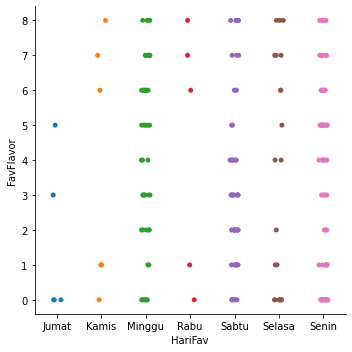

In [33]:
p= sns.catplot(x="HariFav", y="FavFlavor", data=df)

Pada hari rabu, kamis, dan jumat, variasi rasa yang terjual kurang beragam.

Saran: Berikan promo pada rasa es krim yang kurang terjual di hari rabu, kamis, dan jumat.

# Klasterisasi

## Scaling

Karena variabel Pendapatan memiliki nilai jutaan, yang amat berbeda dengan variabel lainnya, maka dilakukan scaling untuk membuat variabel Pendapatan menyerupai variabel lainnya dan hasil pengolahan data dapat lebih akurat dalam menggambaran keadaan sesungguhnya.

In [34]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df['Pendapatan-per-bulan'].values.reshape(-1,1))
print(scaled)

[[-0.51757743]
 [ 1.39089401]
 [-0.25039147]
 [-0.55574685]
 [ 0.13130286]
 [ 0.97103026]
 [ 0.24581113]
 [-1.54815204]
 [-0.479408  ]
 [ 0.05496401]
 [-0.67025521]
 [ 1.00919968]
 [ 1.42906343]
 [-1.16645781]
 [-1.54815204]
 [-0.63208579]
 [ 0.66567488]
 [ 0.58933603]
 [-1.24279665]
 [-0.8229329 ]
 [-1.54815204]
 [-0.479408  ]
 [-0.67025521]
 [ 0.47482767]
 [ 0.39848882]
 [-0.25039147]
 [-1.62449088]
 [-0.25039147]
 [-0.89927175]
 [ 0.66567488]
 [-0.86110233]
 [ 1.04736911]
 [ 0.93286084]
 [ 0.24581113]
 [ 0.05496401]
 [ 0.78018315]
 [-0.02137493]
 [ 0.66567488]
 [-0.02137493]
 [ 0.09313344]
 [-1.54815204]
 [-0.70842464]
 [ 0.66567488]
 [ 1.39089401]
 [ 1.61991055]
 [-0.25039147]
 [ 0.16947228]
 [ 1.00919968]
 [-0.02137493]
 [-0.09771377]
 [ 0.05496401]
 [-1.70082973]
 [ 0.16947228]
 [ 0.62750545]
 [-0.67025521]
 [-1.58632146]
 [ 0.09313344]
 [-1.20462723]
 [ 1.46723285]
 [-0.8229329 ]
 [-0.78476348]
 [ 0.09313344]
 [-0.55574685]
 [-0.51757743]
 [-0.78476348]
 [-0.25039147]
 [ 2.91767

## Encoding

Karena terdapat banyak variabel kategorik yang tidak dilabelkan dengan angka (Kota dan HariFav), maka dilakukan encoding (men-transform data untuk nilai numerik) terhadap kedua variabel.

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["code_kota"] = ord_enc.fit_transform(df[["Kota"]])
df[["Kota", "code_kota"]].head(11)

,Kota,code_kota
0,Jakarta,1.0
1,Depok,0.0
2,Jakarta,1.0
3,Jakarta,1.0
4,Jakarta,1.0
5,Depok,0.0
6,Jakarta,1.0
7,Depok,0.0
8,Jakarta,1.0
9,Jakarta,1.0


In [36]:
df["code_hari"] = ord_enc.fit_transform(df[["HariFav"]])
df[["HariFav", "code_hari"]].head(11)

,HariFav,code_hari
0,Sabtu,4.0
1,Minggu,2.0
2,Minggu,2.0
3,Rabu,3.0
4,Senin,6.0
5,Senin,6.0
6,Senin,6.0
7,Senin,6.0
8,Selasa,5.0
9,Senin,6.0


In [37]:
df["code_jk"] = ord_enc.fit_transform(df[["Jenis Kelamin"]])
df[["Jenis Kelamin", "code_jk"]].head(11)

,Jenis Kelamin,code_jk
0,Wanita,1.0
1,Wanita,1.0
2,Pria,0.0
3,Pria,0.0
4,Wanita,1.0
5,Wanita,1.0
6,Pria,0.0
7,Wanita,1.0
8,Wanita,1.0
9,Wanita,1.0


In [38]:
# Drop kolom yang sudah ada code
# Drop kolom menikah karena menurut kami kurang relevan
df.drop(['Jenis Kelamin', 'Kota', 'HariFav','Menikah'], axis=1, inplace=True)

Keterangan Kode

Kode Kota:

0=Jakarta,
1=Depok,
2=Tangerang

Kode Hari:

0= Jumat,
1= Kamis,
2= Minggu,
3= Rabu,
4= Sabtu,
5= Selasa,
6= Senin

## Clustering

Text(0.5, 1.0, 'Elbow curve')

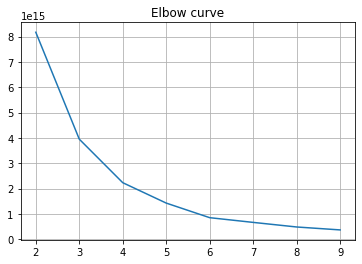

In [39]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(df)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

array([3, 2, 3, 5, 8, 7, 8, 6, 3, 8], dtype=int32)

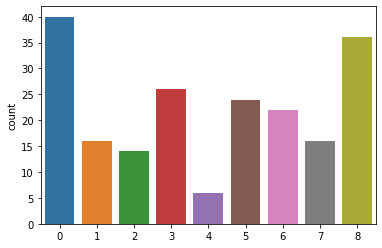

In [40]:
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = 42)
kmPP.fit(df)
C_kmpp = kmPP.predict(df)

sns.countplot(C_kmpp)
C_kmpp[:10]

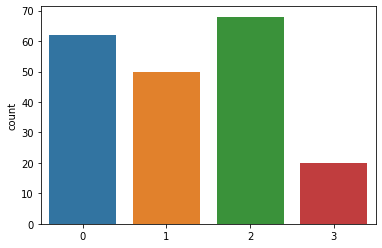

In [41]:
k = 4
km = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, 
                    random_state = 42)
km.fit(df)
# Hasil clusteringnya
C_km = km.predict(df)
p= sns.countplot(C_km)

In [42]:
C_km

array([2, 3, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 3, 1, 1, 2, 0, 0, 1, 1, 1, 2,
       2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 3,
       3, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 3, 1, 1, 2, 2, 2, 1, 2,
       3, 2, 1, 3, 2, 1, 2, 3, 1, 3, 2, 3, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 3, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 3, 2, 1, 2, 3, 0, 3, 1, 2, 2, 0, 2, 0, 1,
       1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 3, 0, 2,
       0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 3, 2, 0, 2, 2, 3, 0,
       0, 1, 2, 0, 0, 0, 3, 1, 3, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 3,
       1, 1], dtype=int32)

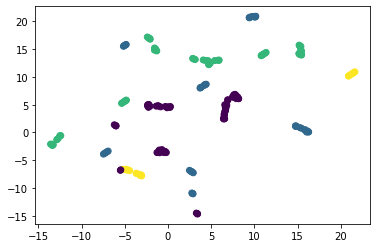

In [43]:
df2 = umap.UMAP(n_neighbors=4, min_dist=0.3, random_state=42).fit_transform(df)
fig, ax = plt.subplots()
ax.scatter(df2[:,0], df2[:,1], c=C_km)
plt.show()

In [44]:
km.inertia_

2230266184785285.5